# Exploring data on COVID-19

> In this post, We will cover the basic syntax of julia language, and explore the data related on COVID-19. This is the summary of lecture "Introduction to Computational Thinking with Julia, with applications to modeling the COVID-19 Pandemic" from MIT.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Julia, MIT]
- image: images/US_data.png

## Why Julia?

- Julia: Developed at MIT by Prof. Alan Edelman's group
- Released in 2012.
- Current release: 1.4

- Free, open source software
- developed by world-wide community on [Github](https://github.com/JuliaLang/julia)
- Over 3000 registered packages in wide range of domains

## Julia

- Modern, powerful language
- Interactive but high performance (fast) - previously mutually exclusive
- Syntax: similar to Python / Matlab / R
- But carefully designed for high-performance computational science & engineering applications
- Design means that most of Julia is written in Julia itself
- Hence much easier to examine and modify algorithms

![us_data](image/US_data.png)

In [1]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [2]:
url

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [3]:
typeof(url)

String

In [4]:
*

* (generic function with 357 methods)

In [5]:
(1 + 2im) * (3 + im)

1 + 7im

In [6]:
@which (1+ 2im) * (3 + im)

*(z::Complex, w::Complex) in Base at complex.jl:277

## Grab the data

In [7]:
download(url, "covid_data.csv")

"covid_data.csv"

In [8]:
readdir

readdir (generic function with 2 methods)

In [9]:
readdir()

234-element Array{String,1}:
 ".ipynb_checkpoints"
 "2020-05-21-Software-Engineering-Practices-Pt-1.ipynb"
 "2020-05-22-01-Decorator.ipynb"
 "2020-05-22-02-More-On-Decorators.ipynb"
 "2020-05-23-01-Read-clean-and-validate.ipynb"
 "2020-05-23-02-Distributions.ipynb"
 "2020-05-24-01-Relationships.ipynb"
 "2020-05-24-02-Multivariate-Thinking.ipynb"
 "2020-05-25-01-Preparing-the-data-for-analysis.ipynb"
 "2020-05-25-02-Exploring-the-relationship-between-gender-and-policing.ipynb"
 "2020-05-25-03-Visual-exploratory-data-analysis.ipynb"
 "2020-05-25-04-Software-Engineering-Practices-Pt-2.ipynb"
 "2020-05-26-01-Analyzing-the-effect-of-weather-on-policing.ipynb"
 ⋮
 "2020-12-28-01-Exploring-data-on-COVID-19.ipynb"
 "README.md"
 "checkpoints"
 "covid_data.csv"
 "dataset"
 "html"
 "image"
 "models"
 "my_icons"
 "spark-warehouse"
 "utils"
 "video"

## Install Package

In [10]:
using Pkg   # built-in package manager in Julia: Pkg
Pkg.add("CSV")   # calls the `add` function from the module Pkg.  This installs a package

   Updating registry at `C:\Users\kcsgo\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\kcsgo\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\kcsgo\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [11]:
Pkg.add("DataFrames")

  Resolving package versions...
   Updating `C:\Users\kcsgo\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\kcsgo\.julia\environments\v1.4\Manifest.toml`
 [no changes]


## Load a package

Load a package every time we run a Julia session:

In [12]:
using CSV, DataFrames

In [13]:
CSV.read("./covid_data.csv", DataFrame)

271×347 DataFrame
 Row │ Province/State                Country/Region       Lat       Long       ⋯
     │ String?                       String               Float64?  Float64?   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                       Afghanistan           33.9391   67.71     ⋯
   2 │ missing                       Albania               41.1533   20.1683
   3 │ missing                       Algeria               28.0339    1.6596
   4 │ missing                       Andorra               42.5063    1.5218
   5 │ missing                       Angola               -11.2027   17.8739   ⋯
   6 │ missing                       Antigua and Barbuda   17.0608  -61.7964
   7 │ missing                       Argentina            -38.4161  -63.6167
   8 │ missing                       Armenia               40.0691   45.0382
   9 │ Australian Capital Territory  Australia            -35.4735  149.012    ⋯
  10 │ New South Wales               Australia            -33.8688  151.209
  11 │ Northern Territory            Australia            -12.4634  130.846
  ⋮  │              ⋮                         ⋮              ⋮         ⋮       ⋱
 262 │ missing                       United Kingdom        55.3781   -3.436
 263 │ missing                       Uruguay              -32.5228  -55.7658   ⋯
 264 │ missing                       Uzbekistan            41.3775   64.5853
 265 │ missing                       Vanuatu              -15.3767  166.959
 266 │ missing                       Venezuela              6.4238  -66.5897
 267 │ missing                       Vietnam               14.0583  108.277    ⋯
 268 │ missing                       West Bank and Gaza    31.9522   35.2332
 269 │ missing                       Yemen                 15.5527   48.5164
 270 │ missing                       Zambia               -13.1339   27.8493
 271 │ missing                       Zimbabwe             -19.0154   29.1549   ⋯
                                                343 columns and 250 rows omitted

In [14]:
data = CSV.read("covid_data.csv", DataFrame)
data

271×347 DataFrame
 Row │ Province/State                Country/Region       Lat       Long       ⋯
     │ String?                       String               Float64?  Float64?   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                       Afghanistan           33.9391   67.71     ⋯
   2 │ missing                       Albania               41.1533   20.1683
   3 │ missing                       Algeria               28.0339    1.6596
   4 │ missing                       Andorra               42.5063    1.5218
   5 │ missing                       Angola               -11.2027   17.8739   ⋯
   6 │ missing                       Antigua and Barbuda   17.0608  -61.7964
   7 │ missing                       Argentina            -38.4161  -63.6167
   8 │ missing                       Armenia               40.0691   45.0382
   9 │ Australian Capital Territory  Australia            -35.4735  149.012    ⋯
  10 │ New South Wales               Australia            -33.8688  151.209
  11 │ Northern Territory            Australia            -12.4634  130.846
  ⋮  │              ⋮                         ⋮              ⋮         ⋮       ⋱
 262 │ missing                       United Kingdom        55.3781   -3.436
 263 │ missing                       Uruguay              -32.5228  -55.7658   ⋯
 264 │ missing                       Uzbekistan            41.3775   64.5853
 265 │ missing                       Vanuatu              -15.3767  166.959
 266 │ missing                       Venezuela              6.4238  -66.5897
 267 │ missing                       Vietnam               14.0583  108.277    ⋯
 268 │ missing                       West Bank and Gaza    31.9522   35.2332
 269 │ missing                       Yemen                 15.5527   48.5164
 270 │ missing                       Zambia               -13.1339   27.8493
 271 │ missing                       Zimbabwe             -19.0154   29.1549   ⋯
                                                343 columns and 250 rows omitted

In [15]:
typeof(data)

DataFrame

We can rename each column name.

In [16]:
data_2 = rename(data, 1 => "province", 2 => "country")
data_2

271×347 DataFrame
 Row │ province                      country              Lat       Long       ⋯
     │ String?                       String               Float64?  Float64?   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                       Afghanistan           33.9391   67.71     ⋯
   2 │ missing                       Albania               41.1533   20.1683
   3 │ missing                       Algeria               28.0339    1.6596
   4 │ missing                       Andorra               42.5063    1.5218
   5 │ missing                       Angola               -11.2027   17.8739   ⋯
   6 │ missing                       Antigua and Barbuda   17.0608  -61.7964
   7 │ missing                       Argentina            -38.4161  -63.6167
   8 │ missing                       Armenia               40.0691   45.0382
   9 │ Australian Capital Territory  Australia            -35.4735  149.012    ⋯
  10 │ New South Wales               Australia            -33.8688  151.209
  11 │ Northern Territory            Australia            -12.4634  130.846
  ⋮  │              ⋮                         ⋮              ⋮         ⋮       ⋱
 262 │ missing                       United Kingdom        55.3781   -3.436
 263 │ missing                       Uruguay              -32.5228  -55.7658   ⋯
 264 │ missing                       Uzbekistan            41.3775   64.5853
 265 │ missing                       Vanuatu              -15.3767  166.959
 266 │ missing                       Venezuela              6.4238  -66.5897
 267 │ missing                       Vietnam               14.0583  108.277    ⋯
 268 │ missing                       West Bank and Gaza    31.9522   35.2332
 269 │ missing                       Yemen                 15.5527   48.5164
 270 │ missing                       Zambia               -13.1339   27.8493
 271 │ missing                       Zimbabwe             -19.0154   29.1549   ⋯
                                                343 columns and 250 rows omitted

In [17]:
# ! is convention: function *modifies* its argument in place
rename!(data, 1 => "province", 2 => "country") 

271×347 DataFrame
 Row │ province                      country              Lat       Long       ⋯
     │ String?                       String               Float64?  Float64?   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                       Afghanistan           33.9391   67.71     ⋯
   2 │ missing                       Albania               41.1533   20.1683
   3 │ missing                       Algeria               28.0339    1.6596
   4 │ missing                       Andorra               42.5063    1.5218
   5 │ missing                       Angola               -11.2027   17.8739   ⋯
   6 │ missing                       Antigua and Barbuda   17.0608  -61.7964
   7 │ missing                       Argentina            -38.4161  -63.6167
   8 │ missing                       Armenia               40.0691   45.0382
   9 │ Australian Capital Territory  Australia            -35.4735  149.012    ⋯
  10 │ New South Wales               Australia            -33.8688  151.209
  11 │ Northern Territory            Australia            -12.4634  130.846
  ⋮  │              ⋮                         ⋮              ⋮         ⋮       ⋱
 262 │ missing                       United Kingdom        55.3781   -3.436
 263 │ missing                       Uruguay              -32.5228  -55.7658   ⋯
 264 │ missing                       Uzbekistan            41.3775   64.5853
 265 │ missing                       Vanuatu              -15.3767  166.959
 266 │ missing                       Venezuela              6.4238  -66.5897
 267 │ missing                       Vietnam               14.0583  108.277    ⋯
 268 │ missing                       West Bank and Gaza    31.9522   35.2332
 269 │ missing                       Yemen                 15.5527   48.5164
 270 │ missing                       Zambia               -13.1339   27.8493
 271 │ missing                       Zimbabwe             -19.0154   29.1549   ⋯
                                                343 columns and 250 rows omitted

In [18]:
data

271×347 DataFrame
 Row │ province                      country              Lat       Long       ⋯
     │ String?                       String               Float64?  Float64?   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                       Afghanistan           33.9391   67.71     ⋯
   2 │ missing                       Albania               41.1533   20.1683
   3 │ missing                       Algeria               28.0339    1.6596
   4 │ missing                       Andorra               42.5063    1.5218
   5 │ missing                       Angola               -11.2027   17.8739   ⋯
   6 │ missing                       Antigua and Barbuda   17.0608  -61.7964
   7 │ missing                       Argentina            -38.4161  -63.6167
   8 │ missing                       Armenia               40.0691   45.0382
   9 │ Australian Capital Territory  Australia            -35.4735  149.012    ⋯
  10 │ New South Wales               Australia            -33.8688  151.209
  11 │ Northern Territory            Australia            -12.4634  130.846
  ⋮  │              ⋮                         ⋮              ⋮         ⋮       ⋱
 262 │ missing                       United Kingdom        55.3781   -3.436
 263 │ missing                       Uruguay              -32.5228  -55.7658   ⋯
 264 │ missing                       Uzbekistan            41.3775   64.5853
 265 │ missing                       Vanuatu              -15.3767  166.959
 266 │ missing                       Venezuela              6.4238  -66.5897
 267 │ missing                       Vietnam               14.0583  108.277    ⋯
 268 │ missing                       West Bank and Gaza    31.9522   35.2332
 269 │ missing                       Yemen                 15.5527   48.5164
 270 │ missing                       Zambia               -13.1339   27.8493
 271 │ missing                       Zimbabwe             -19.0154   29.1549   ⋯
                                                343 columns and 250 rows omitted

In [19]:
?rename

search: rename rename! propertynames



```
rename(df::AbstractDataFrame, vals::AbstractVector{Symbol};
       makeunique::Bool=false)
rename(df::AbstractDataFrame, vals::AbstractVector{<:AbstractString};
       makeunique::Bool=false)
rename(df::AbstractDataFrame, (from => to)::Pair...)
rename(df::AbstractDataFrame, d::AbstractDict)
rename(df::AbstractDataFrame, d::AbstractVector{<:Pair})
rename(f::Function, df::AbstractDataFrame)
```

Create a new data frame that is a copy of `df` with changed column names. Each name is changed at most once. Permutation of names is allowed.

# Arguments

  * `df` : the `AbstractDataFrame`; if it is a `SubDataFrame` then renaming is only allowed if it was created using `:` as a column selector.
  * `d` : an `AbstractDict` or an `AbstractVector` of `Pair`s that maps the original names or column numbers to new names
  * `f` : a function which for each column takes the old name as a `String` and returns the new name that gets converted to a `Symbol`
  * `vals` : new column names as a vector of `Symbol`s or `AbstractString`s of the same length as the number of columns in `df`
  * `makeunique` : if `false` (the default), an error will be raised if duplicate names are found; if `true`, duplicate names will be suffixed with `_i` (`i` starting at 1 for the first duplicate).

If pairs are passed to `rename` (as positional arguments or in a dictionary or a vector) then:

  * `from` value can be a `Symbol`, an `AbstractString` or an `Integer`;
  * `to` value can be a `Symbol` or an `AbstractString`.

Mixing symbols and strings in `to` and `from` is not allowed.

See also: [`rename!`](@ref)

# Examples

```julia
julia> df = DataFrame(i = 1, x = 2, y = 3)
1×3 DataFrame
 Row │ i      x      y
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3

julia> rename(df, :i => :A, :x => :X)
1×3 DataFrame
 Row │ A      X      y
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3

julia> rename(df, :x => :y, :y => :x)
1×3 DataFrame
 Row │ i      y      x
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3

julia> rename(df, [1 => :A, 2 => :X])
1×3 DataFrame
 Row │ A      X      y
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3

julia> rename(df, Dict("i" => "A", "x" => "X"))
1×3 DataFrame
 Row │ A      X      y
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3

julia> rename(uppercase, df)
1×3 DataFrame
 Row │ I      X      Y
     │ Int64  Int64  Int64
─────┼─────────────────────
   1 │     1      2      3
```


## Interact.jl: Simple interactive visualizations

In [20]:
Pkg.add("Interact")

  Resolving package versions...
   Updating `C:\Users\kcsgo\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\kcsgo\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [21]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-940240230858349888\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8345940758549997276\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-940240230858349888\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [22]:
for i in 1:10
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10


In [23]:
typeof(1:10)

UnitRange{Int64}

In [24]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [25]:
for i in 1:10
    println("i = ", i)
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10


In [31]:
countries = data[2:5, 2]

4-element Array{String,1}:
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"

In [32]:
countries = data[1:end, 2]

271-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [33]:
countries = collect(data[:, 2])

271-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [34]:
unique_countries = unique(countries)

191-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

> Note: Julia has 1-based indexing: indices of vectors start at 1, not 0

## Extract data and plot

In [36]:
startswith("United", "U")

true

In [37]:
startswith("David", "U")

false

Array comprehension:

In [38]:
U_countries = [startswith(country, "U") for country in countries]

271-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0
 0
 0

In [40]:
data[U_countries, :]

17×347 DataFrame
 Row │ province                     country               Lat        Long      ⋯
     │ String?                      String                Float64?   Float64?  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ missing                      US                     40.0      -100.0    ⋯
   2 │ missing                      Uganda                  1.37333    32.2903
   3 │ missing                      Ukraine                48.3794     31.1656
   4 │ missing                      United Arab Emirates   23.4241     53.8478
   5 │ Anguilla                     United Kingdom         18.2206    -63.0686 ⋯
   6 │ Bermuda                      United Kingdom         32.3078    -64.7505
   7 │ British Virgin Islands       United Kingdom         18.4207    -64.64
   8 │ Cayman Islands               United Kingdom         19.3133    -81.2546
   9 │ Channel Islands              United Kingdom         49.3723     -2.3644 ⋯
  10 │ Falkland Islands (Malvinas)  United Kingdom        -51.7963    -59.5236
  11 │ Gibraltar                    United Kingdom         36.1408     -5.3536
  12 │ Isle of Man                  United Kingdom         54.2361     -4.5481
  13 │ Montserrat                   United Kingdom         16.7425    -62.1874 ⋯
  14 │ Turks and Caicos Islands     United Kingdom         21.694     -71.7979
  15 │ missing                      United Kingdom         55.3781     -3.436
  16 │ missing                      Uruguay               -32.5228    -55.7658
  17 │ missing                      Uzbekistan             41.3775     64.5853 ⋯
                                                             343 columns omitted

In [41]:
# . is "broadcasting": apply operation to each element of a vector
countries .== "US"  

271-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [42]:
US_row = findfirst(countries .== "US")

248

In [43]:
data[US_row, :]

DataFrameRow
 Row │ province  country  Lat       Long      1/22/20  1/23/20  1/24/20  1/25/ ⋯
     │ String?   String   Float64?  Float64?  Int64    Int64    Int64    Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
 248 │ missing   US           40.0    -100.0        1        1        2        ⋯
                                                             340 columns omitted

In [46]:
UC_data_row = data[US_row, :]

DataFrameRow
 Row │ province  country  Lat       Long      1/22/20  1/23/20  1/24/20  1/25/ ⋯
     │ String?   String   Float64?  Float64?  Int64    Int64    Int64    Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
 248 │ missing   US           40.0    -100.0        1        1        2        ⋯
                                                             340 columns omitted

In [47]:
US_data = convert(Vector, UC_data_row[5:end])

343-element Array{Int64,1}:
        1
        1
        2
        2
        5
        5
        5
        6
        6
        8
        8
        8
       11
        ⋮
 17468841
 17665284
 17853731
 18045048
 18239758
 18466484
 18665343
 18765529
 18992126
 19142603
 19309281
 19510836

In [49]:
Pkg.add("Plots")

  Resolving package versions...
  Installed libfdk_aac_jll ── v0.1.6+4
  Installed EarCut_jll ────── v2.1.5+1
  Installed x265_jll ──────── v3.0.0+3
  Installed Showoff ───────── v0.3.2
  Installed RecipesPipeline ─ v0.1.13
  Installed Contour ───────── v0.5.7
  Installed StaticArrays ──── v1.0.1
  Installed Plots ─────────── v1.6.12
  Installed FreeType2_jll ─── v2.10.1+5
  Installed Bzip2_jll ─────── v1.0.6+5
  Installed LAME_jll ──────── v3.100.0+3
  Installed OpenSSL_jll ───── v1.1.1+6
  Installed Grisu ─────────── v1.0.0
  Installed libass_jll ────── v0.14.0+4
  Installed libvorbis_jll ─── v1.3.6+6
  Installed LaTeXStrings ──── v1.2.0
  Installed IterTools ─────── v1.3.0
  Installed Opus_jll ──────── v1.3.1+3
  Installed Adapt ─────────── v2.3.0
  Installed LibVPX_jll ────── v1.9.0+1
  Installed GeometryTypes ─── v0.8.4
  Installed FFMPEG_jll ────── v4.3.1+4
  Installed PlotUtils ─────── v1.0.8
  Installed FFMPEG ────────── v0.4.0
  Installed Ogg_jll ───────── v1.3.4+2
  Installed

In [50]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


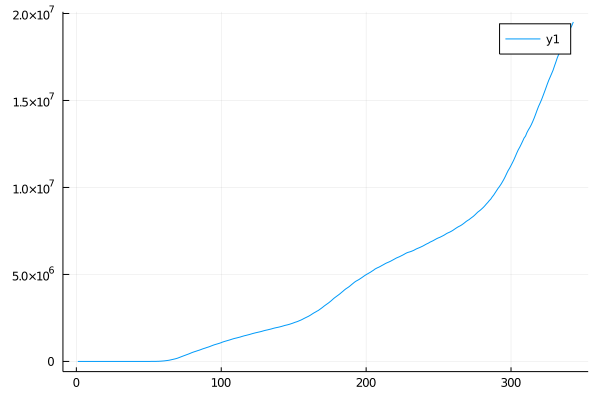

In [51]:
plot(US_data)

In [52]:
col_names = names(data)

347-element Array{String,1}:
 "province"
 "country"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "12/18/20"
 "12/19/20"
 "12/20/20"
 "12/21/20"
 "12/22/20"
 "12/23/20"
 "12/24/20"
 "12/25/20"
 "12/26/20"
 "12/27/20"
 "12/28/20"
 "12/29/20"

In [58]:
date_strings = String.(names(data))[5:end]

343-element Array{String,1}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "12/18/20"
 "12/19/20"
 "12/20/20"
 "12/21/20"
 "12/22/20"
 "12/23/20"
 "12/24/20"
 "12/25/20"
 "12/26/20"
 "12/27/20"
 "12/28/20"
 "12/29/20"

Parse: convert string representation into a Julia object

In [59]:
date_strings[1]

"1/22/20"

In [56]:
using Dates

In [57]:
format = Dates.DateFormat("d/m/Y")

dateformat"d/m/Y"

In [60]:
parse(Date, date_strings[1], format)

ArgumentError: ArgumentError: Month: 22 out of range (1:12)

In [62]:
format = Dates.DateFormat("m/d/Y")
parse(Date, date_strings[1], format) + Year(2000)

2020-01-22

In [63]:
dates = parse.(Date, date_strings, format) + Year(2000)

343-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2020-12-18
 2020-12-19
 2020-12-20
 2020-12-21
 2020-12-22
 2020-12-23
 2020-12-24
 2020-12-25
 2020-12-26
 2020-12-27
 2020-12-28
 2020-12-29

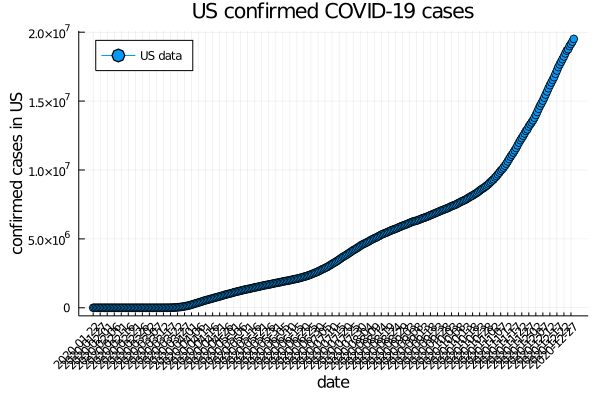

In [67]:
plot(dates, US_data, xticks=dates[1:5:end], xrotation=45, leg=:topleft, 
    label="US data", m=:o)

xlabel!("date")
ylabel!("confirmed cases in US")
title!("US confirmed COVID-19 cases")

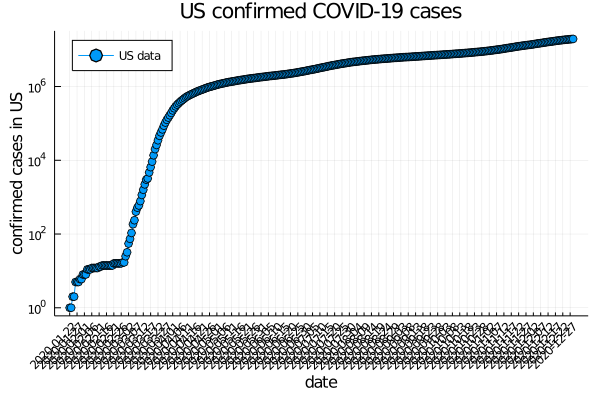

In [68]:
plot(dates, US_data, xticks=dates[1:5:end], xrotation=45, leg=:topleft, 
    label="US data", m=:o,
    yscale=:log10)

xlabel!("date")
ylabel!("confirmed cases in US")
title!("US confirmed COVID-19 cases")